In [365]:
import sklearn
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
print(sklearn.__version__)

1.0.2


In [596]:
stroke_df = pd.read_csv('./healthcare-dataset-stroke-data.csv')
y_stroke_df = stroke_df['stroke']
X_stroke_df = stroke_df.drop(['stroke', 'id'], axis=1)
# X_stroke_df = stroke_df.drop('id', axis=1)
y_stroke_df.shape
X_stroke_df.shape

(5110, 10)

In [135]:
X_stroke_df['avg_glucose_level'] = \
(X_stroke_df['avg_glucose_level'] - X_stroke_df['avg_glucose_level'].mean()) / X_stroke_df['avg_glucose_level'].std()

In [138]:
X_stroke_df['age'] = \
(X_stroke_df['age'] - X_stroke_df['age'].mean()) / X_stroke_df['age'].std()

In [586]:
# X_stroke_df.tail()
X_stroke_df['bmi'].fillna(stroke_df['bmi'].mean(),inplace=True)
# stroke_df[stroke_df.isna().any(axis=1)]
# stroke_df.isna().any(axis=1).sum()
X_stroke_df.isna().any(axis=1).sum()
# print(X_stroke_df[X_stroke_df.isna().any(axis=1)].to_string())

0

In [144]:
X_stroke_df['bmi'] = \
(X_stroke_df['bmi'] - X_stroke_df['bmi'].mean()) / X_stroke_df['bmi'].std()

In [237]:
norm_features = ['avg_glucose_level', 'age', 'bmi']

def normalize_features(df, features):
    for feature in features:
        df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()
    return df

X_stroke_df['bmi'].fillna(X_stroke_df['bmi'].mean(),inplace=True)
X_stroke_df = normalize_features(X_stroke_df, norm_features)

In [581]:
X_stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [182]:
print(stroke_df['smoking_status'].unique())

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [413]:
print(X_stroke_df['smoking_status'].unique())

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [181]:
stroke_df.loc[stroke_df['smoking_status']=='Unknown']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0


In [178]:
stroke_df.loc[stroke_df['smoking_status']=='Unknown'].count()

id                   1544
gender               1544
age                  1544
hypertension         1544
heart_disease        1544
ever_married         1544
work_type            1544
Residence_type       1544
avg_glucose_level    1544
bmi                  1483
smoking_status       1544
stroke               1544
dtype: int64

In [124]:
1544/5110

0.3021526418786693

In [95]:
print(stroke_df['gender'].unique())

['Male' 'Female' 'Other']


In [109]:
print(X_stroke_df['gender'].unique())

['Male' 'Female' 'Other']


In [105]:
stroke_df.loc[stroke_df['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [180]:
X_stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [200]:
X_stroke_df

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender_ordinal
0,1.051331,0,1,Yes,Private,Urban,2.706111,1.001136e+00,formerly smoked,0.0
1,0.785993,0,0,Yes,Self-employed,Rural,2.121351,4.615102e-16,never smoked,1.0
2,1.626231,0,1,Yes,Private,Rural,-0.005028,4.685314e-01,never smoked,0.0
3,0.255317,0,0,Yes,Private,Urban,1.437217,7.153482e-01,smokes,1.0
4,1.582008,1,0,Yes,Self-employed,Rural,1.501038,-6.356489e-01,never smoked,1.0
...,...,...,...,...,...,...,...,...,...,...
5105,1.626231,1,0,Yes,Private,Urban,-0.494609,4.615102e-16,never smoked,1.0
5106,1.670454,0,0,Yes,Self-employed,Urban,0.420734,1.442808e+00,never smoked,1.0
5107,-0.363806,0,0,Yes,Self-employed,Rural,-0.511393,2.217146e-01,never smoked,1.0
5108,0.343763,0,0,Yes,Private,Rural,1.328127,-4.278032e-01,formerly smoked,0.0


In [184]:
print(X_stroke_df['smoking_status'].unique())

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [414]:
def ordinalize_features(df):

    gender_dict = {'Male':0,
                'Female':2,
                'Other':1}
    # Create the mapped values in a new column
    df['gender_ordinal'] = df['gender'].map(gender_dict)
    df = df.drop(['gender'], axis=1)

    smoking_dict = {'never smoked':0,
            'formerly smoked':1,
            'smokes':2,
            'Unknown': 1}
    # Create the mapped values in a new column
    df['smoking_ord'] = df['smoking_status'].map(smoking_dict)
    df = df.drop(['smoking_status'], axis=1)
    
    married_dict = {'Yes': 1,
                    'No': 0}
    # Create the mapped values in a new column
    df['married_ord'] = df['ever_married'].map(married_dict)
    df = df.drop(['ever_married'], axis=1)

    residence_dict = {'Urban': 0,
                    'Rural': 1}
    # Create the mapped values in a new column
    df['residence_ord'] = df['Residence_type'].map(residence_dict)
    df = df.drop(['Residence_type'], axis=1)

    return df

X_stroke_df = ordinalize_features(X_stroke_df)

In [269]:
X_stroke_df

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,gender_ordinal,smoking_ord,married_ord,residence_ord
0,67.0,0,1,Private,228.69,36.6,0,1,1,0
1,61.0,0,0,Self-employed,202.21,NaN,2,0,1,1
2,80.0,0,1,Private,105.92,32.5,0,0,1,1
3,49.0,0,0,Private,171.23,34.4,2,2,1,0
4,79.0,1,0,Self-employed,174.12,24.0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,Private,83.75,NaN,2,0,1,0
5106,81.0,0,0,Self-employed,125.20,40.0,2,0,1,0
5107,35.0,0,0,Self-employed,82.99,30.6,2,0,1,1
5108,51.0,0,0,Private,166.29,25.6,0,1,1,1


In [121]:
print(stroke_df['ever_married'].unique())

['Yes' 'No']


In [122]:
print(stroke_df['work_type'].unique())

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [123]:
print(stroke_df['Residence_type'].unique())

['Urban' 'Rural']


In [125]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [248]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['work_type']),
    remainder='passthrough')

transformed = transformer.fit_transform(X_stroke_df)
X_transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
print(X_transformed_df.head())
X_transformed_df

   onehotencoder__x0_Govt_job  onehotencoder__x0_Never_worked  \
0                         0.0                             0.0   
1                         0.0                             0.0   
2                         0.0                             0.0   
3                         0.0                             0.0   
4                         0.0                             0.0   

   onehotencoder__x0_Private  onehotencoder__x0_Self-employed  \
0                        1.0                              0.0   
1                        0.0                              1.0   
2                        1.0                              0.0   
3                        1.0                              0.0   
4                        0.0                              1.0   

   onehotencoder__x0_children       age  hypertension  heart_disease  \
0                         0.0  1.051331           0.0            1.0   
1                         0.0  0.785993           0.0            0.0   
2 

,onehotencoder__x0_Govt_job,onehotencoder__x0_Never_worked,onehotencoder__x0_Private,onehotencoder__x0_Self-employed,onehotencoder__x0_children,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_ordinal,smoking_ord
0,0.0,0.0,1.0,0.0,0.0,1.051331,0.0,1.0,1.0,1.0,2.706111,1.001136e+00,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.785993,0.0,0.0,1.0,0.0,2.121351,4.615102e-16,2.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.626231,0.0,1.0,1.0,0.0,-0.005028,4.685314e-01,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.255317,0.0,0.0,1.0,1.0,1.437217,7.153482e-01,2.0,2.0
4,0.0,0.0,0.0,1.0,0.0,1.582008,1.0,0.0,1.0,0.0,1.501038,-6.356489e-01,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,0.0,1.0,0.0,0.0,1.626231,1.0,0.0,1.0,1.0,-0.494609,4.615102e-16,2.0,0.0
5106,0.0,0.0,0.0,1.0,0.0,1.670454,0.0,0.0,1.0,1.0,0.420734,1.442808e+00,2.0,0.0
5107,0.0,0.0,0.0,1.0,0.0,-0.363806,0.0,0.0,1.0,0.0,-0.511393,2.217146e-01,2.0,0.0
5108,0.0,0.0,1.0,0.0,0.0,0.343763,0.0,0.0,1.0,0.0,1.328127,-4.278032e-01,0.0,1.0


In [148]:
print(transformed_df['gender_ordinal'].unique())

[0.  1.  0.5]


In [245]:
#automatically done by one hot encoder
def nominalize_features(df):
    features = ['ever_married', 'Residence_type']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

nominalize_features(X_stroke_df)

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,gender_ordinal,smoking_ord
0,1.051331,0,1,1,Private,1,2.706111,1.001136e+00,0,1
1,0.785993,0,0,1,Self-employed,0,2.121351,4.615102e-16,2,0
2,1.626231,0,1,1,Private,0,-0.005028,4.685314e-01,0,0
3,0.255317,0,0,1,Private,1,1.437217,7.153482e-01,2,2
4,1.582008,1,0,1,Self-employed,0,1.501038,-6.356489e-01,2,0
...,...,...,...,...,...,...,...,...,...,...
5105,1.626231,1,0,1,Private,1,-0.494609,4.615102e-16,2,0
5106,1.670454,0,0,1,Self-employed,1,0.420734,1.442808e+00,2,0
5107,-0.363806,0,0,1,Self-employed,0,-0.511393,2.217146e-01,2,0
5108,0.343763,0,0,1,Private,0,1.328127,-4.278032e-01,0,1


In [226]:
X_stroke_df

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,gender_ordinal,smoking_ord
0,1.051331,0,1,1,Private,1,2.706111,1.001136e+00,0.0,1
1,0.785993,0,0,1,Self-employed,0,2.121351,4.615102e-16,1.0,0
2,1.626231,0,1,1,Private,0,-0.005028,4.685314e-01,0.0,0
3,0.255317,0,0,1,Private,1,1.437217,7.153482e-01,1.0,2
4,1.582008,1,0,1,Self-employed,0,1.501038,-6.356489e-01,1.0,0
...,...,...,...,...,...,...,...,...,...,...
5105,1.626231,1,0,1,Private,1,-0.494609,4.615102e-16,1.0,0
5106,1.670454,0,0,1,Self-employed,1,0.420734,1.442808e+00,1.0,0
5107,-0.363806,0,0,1,Self-employed,0,-0.511393,2.217146e-01,1.0,0
5108,0.343763,0,0,1,Private,0,1.328127,-4.278032e-01,0.0,1


In [156]:
X_stroke_df.info()
X_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   ever_married       5110 non-null   int32  
 4   work_type          5110 non-null   object 
 5   Residence_type     5110 non-null   int32  
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                5110 non-null   float64
 8   smoking_ordinal    5110 non-null   int64  
 9   gender_ordinal     5110 non-null   float64
dtypes: float64(4), int32(2), int64(3), object(1)
memory usage: 359.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   onehote

In [571]:
y_stroke_df.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:>

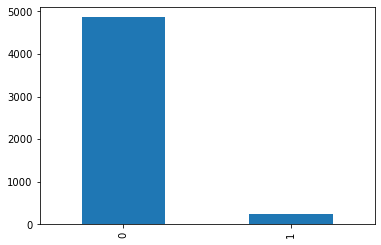

In [570]:
y_stroke_df.value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

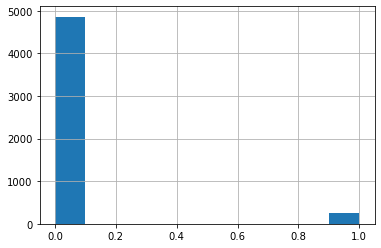

In [569]:
y_stroke_df.hist()

<AxesSubplot:ylabel='Frequency'>

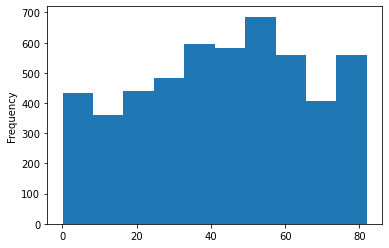

In [578]:
X_stroke_df['age'].plot(kind='hist')

<AxesSubplot:xlabel='age'>

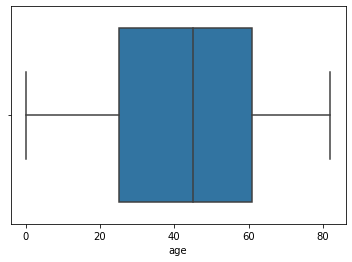

In [579]:
sns.boxplot(X_stroke_df['age'])

<AxesSubplot:ylabel='Frequency'>

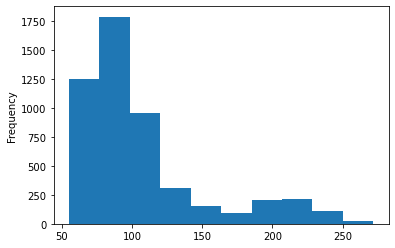

In [556]:
X_stroke_df['avg_glucose_level'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

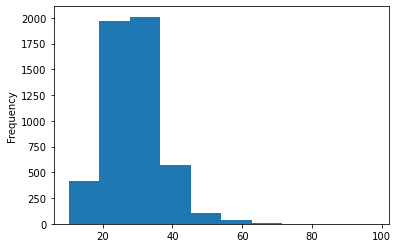

In [557]:
X_stroke_df['bmi'].plot(kind='hist')

In [56]:
!pip install lightgbm

In [57]:
from imblearn.over_sampling import SMOTE

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # Add ROC-AUC 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('Covariance Matrix')
    print(confusion)
    # ROC-AUC print 
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [82]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [60]:
from sklearn.model_selection import train_test_split

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X_stroke_df, y_stroke_df, test_size=0.3, random_state=0, stratify=y_stroke_df)

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y_stroke_df, test_size=0.3, random_state=0, stratify=y_stroke_df)

In [250]:
X_train.shape

(3577, 14)

In [251]:
X_test.shape

(1533, 14)

In [252]:
print('Training Data Label Value Ratio')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('Testing Data Label Value Ratio')
print(y_test.value_counts()/y_test.shape[0] * 100)

Training Data Label Value Ratio
0    95.135588
1     4.864412
Name: stroke, dtype: float64
Testing Data Label Value Ratio
0    95.107632
1     4.892368
Name: stroke, dtype: float64


In [255]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [256]:
X_res.shape

(6806, 14)

In [76]:
print('Training Data Label Value Ratio')
print(y_res.value_counts()/y_res.shape[0] * 100)
print('Testing Data Label Value Ratio')
print(y_test.value_counts()/y_test.shape[0] * 100)

Training Data Label Value Ratio
0    50.0
1    50.0
Name: stroke, dtype: float64
Testing Data Label Value Ratio
0    95.107632
1     4.892368
Name: stroke, dtype: float64


In [79]:
!pip install lightgbm

In [260]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

Covariance Matrix
[[1431   27]
 [  70    5]]
Accuracy: 0.9367, Precision: 0.1562, Recall: 0.0667,    F1: 0.0935, AUC:0.7717


In [259]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_res, ftr_test=X_test, tgt_train=y_res, tgt_test=y_test)

Covariance Matrix
[[1411   47]
 [  65   10]]
Accuracy: 0.9269, Precision: 0.1754, Recall: 0.1333,    F1: 0.1515, AUC:0.8058


In [257]:
log_model = LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
log_model.fit(X_res,y_res,eval_set=[(X_test,y_test),(X_res,y_res)],
          verbose=20,eval_metric='logloss')
get_model_train_eval(log_model, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[20]	training's binary_logloss: 0.277008	valid_0's binary_logloss: 0.332704
[40]	training's binary_logloss: 0.15891	valid_0's binary_logloss: 0.240561
[60]	training's binary_logloss: 0.112408	valid_0's binary_logloss: 0.215007
[80]	training's binary_logloss: 0.0872248	valid_0's binary_logloss: 0.208936
[100]	training's binary_logloss: 0.0712515	valid_0's binary_logloss: 0.204697
Covariance Matrix
[[1437   21]
 [  74    1]]
Accuracy: 0.9380, Precision: 0.0455, Recall: 0.0133,    F1: 0.0206, AUC:0.8309


In [258]:
log_2_model = LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
log_2_model.fit(X_res,y_res,eval_set=[(X_test,y_test),(X_res,y_res)],
          verbose=20,eval_metric='logloss')
get_model_train_eval(log_2_model, ftr_train=X_res, ftr_test=X_test, tgt_train=y_res, tgt_test=y_test)

[20]	training's binary_logloss: 0.277008	valid_0's binary_logloss: 0.332704
[40]	training's binary_logloss: 0.15891	valid_0's binary_logloss: 0.240561
[60]	training's binary_logloss: 0.112408	valid_0's binary_logloss: 0.215007
[80]	training's binary_logloss: 0.0872248	valid_0's binary_logloss: 0.208936
[100]	training's binary_logloss: 0.0712515	valid_0's binary_logloss: 0.204697
Covariance Matrix
[[1400   58]
 [  65   10]]
Accuracy: 0.9198, Precision: 0.1471, Recall: 0.1333,    F1: 0.1399, AUC:0.7996


In [88]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

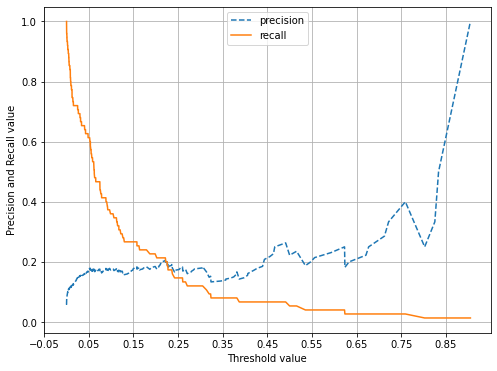

In [92]:
precision_recall_curve_plot( y_test, log_model.predict_proba(X_test)[:, 1] )

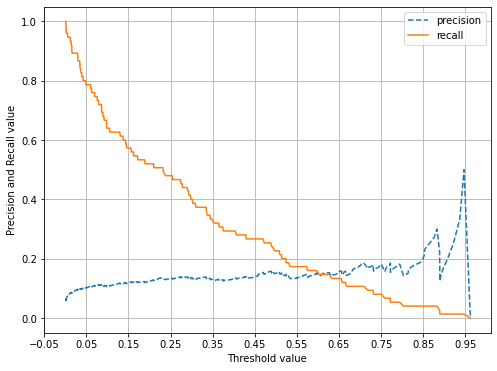

In [93]:
precision_recall_curve_plot( y_test, log_2_model.predict_proba(X_test)[:, 1] )

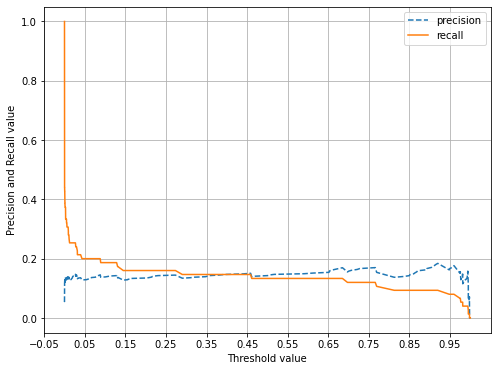

In [94]:
precision_recall_curve_plot( y_test, lgbm_clf.predict_proba(X_test)[:, 1] )

In [157]:
X_tr_train, X_tr_test, y_train, y_test = train_test_split(X_transformed_df, y_stroke_df, test_size=0.3, random_state=0, stratify=y_stroke_df)

In [159]:
X_tr_test.shape

(1533, 14)

In [162]:
X_res, y_res = sm.fit_resample(X_tr_train, y_train)

In [163]:
X_res.shape

(6806, 14)

In [164]:
print('Training Data Label Value Ratio')
print(y_res.value_counts()/y_res.shape[0] * 100)
print('Testing Data Label Value Ratio')
print(y_test.value_counts()/y_test.shape[0] * 100)

Training Data Label Value Ratio
0    50.0
1    50.0
Name: stroke, dtype: float64
Testing Data Label Value Ratio
0    95.107632
1     4.892368
Name: stroke, dtype: float64


In [166]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_res, ftr_test=X_tr_test, tgt_train=y_res, tgt_test=y_test)

Covariance Matrix
[[1405   53]
 [  65   10]]
Accuracy: 0.9230, Precision: 0.1587, Recall: 0.1333,    F1: 0.1449, AUC:0.7941


In [701]:
log_model = LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
log_model.fit(X_res,y_res,eval_set=[(X_test,y_test),(X_res,y_res)],
          verbose=20,eval_metric='logloss')
get_model_train_eval(log_model, ftr_train=X_res, ftr_test=X_test, tgt_train=y_res, tgt_test=y_test)

[20]	training's binary_logloss: 0.280506	valid_0's binary_logloss: 0.330579
[40]	training's binary_logloss: 0.17085	valid_0's binary_logloss: 0.237388
[60]	training's binary_logloss: 0.124409	valid_0's binary_logloss: 0.210079
[80]	training's binary_logloss: 0.0993007	valid_0's binary_logloss: 0.198712
[100]	training's binary_logloss: 0.0820904	valid_0's binary_logloss: 0.195262
Covariance Matrix
[[947  25]
 [ 47   3]]
Accuracy: 0.9295, Precision: 0.1071, Recall: 0.0600,    F1: 0.0769, AUC:0.8071


In [297]:
X_res, y_res, X_tr_test, y_test

(      onehotencoder__x0_Govt_job  onehotencoder__x0_Never_worked  \
 0                            0.0                             0.0   
 1                            0.0                             0.0   
 2                            0.0                             0.0   
 3                            0.0                             0.0   
 4                            0.0                             0.0   
 ...                          ...                             ...   
 6801                         0.0                             0.0   
 6802                         0.0                             0.0   
 6803                         0.0                             0.0   
 6804                         0.0                             0.0   
 6805                         0.0                             0.0   
 
       onehotencoder__x0_Private  onehotencoder__x0_Self-employed  \
 0                        1.0000                           0.0000   
 1                        1.0000

In [286]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [287]:
tf.random.set_seed(1)

In [695]:
model = Sequential(
    [
        tf.keras.Input(shape=(14,)),
        tf.keras.layers.Dense(units=6, activation="relu"),
        tf.keras.layers.Dense(units=1, activation="sigmoid")
    ], name="my_model"
)

In [696]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 6)                 90        
                                                                 
 dense_14 (Dense)            (None, 1)                 7         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [697]:
model.compile(
  'adam',
  loss='binary_crossentropy',
  metrics=['accuracy', tf.keras.metrics.AUC()],
)

In [698]:
history = model.fit(X_res, y_res, validation_data=(X_test, y_test), epochs=200)

Epoch 1/200
244/244 [==============================] - 1s 4ms/step - loss: 0.7318 - accuracy: 0.5833 - auc_5: 0.5856 - val_loss: 0.5353 - val_accuracy: 0.7202 - val_auc_5: 0.6046
Epoch 2/200
244/244 [==============================] - 1s 3ms/step - loss: 0.5567 - accuracy: 0.7083 - auc_5: 0.7888 - val_loss: 0.5079 - val_accuracy: 0.6908 - val_auc_5: 0.7144
Epoch 3/200
244/244 [==============================] - 1s 3ms/step - loss: 0.4888 - accuracy: 0.7825 - auc_5: 0.8410 - val_loss: 0.4775 - val_accuracy: 0.7045 - val_auc_5: 0.7589
Epoch 4/200
244/244 [==============================] - 1s 3ms/step - loss: 0.4525 - accuracy: 0.8008 - auc_5: 0.8609 - val_loss: 0.4643 - val_accuracy: 0.7280 - val_auc_5: 0.7870
Epoch 5/200
244/244 [==============================] - 1s 3ms/step - loss: 0.4299 - accuracy: 0.8110 - auc_5: 0.8733 - val_loss: 0.4507 - val_accuracy: 0.7485 - val_auc_5: 0.7974
Epoch 6/200
244/244 [==============================] - 1s 3ms/step - loss: 0.4186 - accuracy: 0.8163 - au

244/244 [==============================] - 1s 3ms/step - loss: 0.3787 - accuracy: 0.8347 - auc_5: 0.9005 - val_loss: 0.4453 - val_accuracy: 0.7779 - val_auc_5: 0.7833
Epoch 47/200
244/244 [==============================] - 1s 3ms/step - loss: 0.3782 - accuracy: 0.8325 - auc_5: 0.9008 - val_loss: 0.4512 - val_accuracy: 0.7740 - val_auc_5: 0.7840
Epoch 48/200
244/244 [==============================] - 1s 3ms/step - loss: 0.3782 - accuracy: 0.8340 - auc_5: 0.9009 - val_loss: 0.4477 - val_accuracy: 0.7789 - val_auc_5: 0.7819
Epoch 49/200
244/244 [==============================] - 1s 3ms/step - loss: 0.3781 - accuracy: 0.8326 - auc_5: 0.9010 - val_loss: 0.4507 - val_accuracy: 0.7759 - val_auc_5: 0.7821
Epoch 50/200
244/244 [==============================] - 1s 3ms/step - loss: 0.3780 - accuracy: 0.8341 - auc_5: 0.9009 - val_loss: 0.4494 - val_accuracy: 0.7798 - val_auc_5: 0.7820
Epoch 51/200
244/244 [==============================] - 1s 3ms/step - loss: 0.3776 - accuracy: 0.8339 - auc_5: 0.

244/244 [==============================] - 1s 3ms/step - loss: 0.3731 - accuracy: 0.8341 - auc_5: 0.9030 - val_loss: 0.4452 - val_accuracy: 0.7730 - val_auc_5: 0.7745
Epoch 92/200
244/244 [==============================] - 1s 3ms/step - loss: 0.3731 - accuracy: 0.8356 - auc_5: 0.9028 - val_loss: 0.4416 - val_accuracy: 0.7750 - val_auc_5: 0.7750
Epoch 93/200
244/244 [==============================] - 1s 3ms/step - loss: 0.3730 - accuracy: 0.8335 - auc_5: 0.9033 - val_loss: 0.4332 - val_accuracy: 0.7798 - val_auc_5: 0.7741
Epoch 94/200
244/244 [==============================] - 1s 3ms/step - loss: 0.3730 - accuracy: 0.8357 - auc_5: 0.9030 - val_loss: 0.4568 - val_accuracy: 0.7701 - val_auc_5: 0.7754
Epoch 95/200
244/244 [==============================] - 1s 3ms/step - loss: 0.3729 - accuracy: 0.8329 - auc_5: 0.9033 - val_loss: 0.4544 - val_accuracy: 0.7691 - val_auc_5: 0.7755
Epoch 96/200
244/244 [==============================] - 1s 3ms/step - loss: 0.3730 - accuracy: 0.8350 - auc_5: 0.

244/244 [==============================] - 1s 3ms/step - loss: 0.3705 - accuracy: 0.8340 - auc_5: 0.9043 - val_loss: 0.4475 - val_accuracy: 0.7750 - val_auc_5: 0.7741
Epoch 137/200
244/244 [==============================] - 1s 3ms/step - loss: 0.3704 - accuracy: 0.8330 - auc_5: 0.9045 - val_loss: 0.4549 - val_accuracy: 0.7740 - val_auc_5: 0.7765
Epoch 138/200
244/244 [==============================] - 1s 3ms/step - loss: 0.3705 - accuracy: 0.8329 - auc_5: 0.9043 - val_loss: 0.4496 - val_accuracy: 0.7750 - val_auc_5: 0.7755
Epoch 139/200
244/244 [==============================] - 1s 4ms/step - loss: 0.3701 - accuracy: 0.8318 - auc_5: 0.9043 - val_loss: 0.4541 - val_accuracy: 0.7720 - val_auc_5: 0.7757
Epoch 140/200
244/244 [==============================] - 1s 3ms/step - loss: 0.3700 - accuracy: 0.8339 - auc_5: 0.9048 - val_loss: 0.4660 - val_accuracy: 0.7661 - val_auc_5: 0.7769
Epoch 141/200
244/244 [==============================] - 1s 3ms/step - loss: 0.3698 - accuracy: 0.8345 - auc_

244/244 [==============================] - 1s 3ms/step - loss: 0.3662 - accuracy: 0.8352 - auc_5: 0.9064 - val_loss: 0.4466 - val_accuracy: 0.7701 - val_auc_5: 0.7732
Epoch 182/200
244/244 [==============================] - 1s 3ms/step - loss: 0.3660 - accuracy: 0.8363 - auc_5: 0.9064 - val_loss: 0.4593 - val_accuracy: 0.7632 - val_auc_5: 0.7733
Epoch 183/200
244/244 [==============================] - 1s 3ms/step - loss: 0.3658 - accuracy: 0.8374 - auc_5: 0.9067 - val_loss: 0.4495 - val_accuracy: 0.7691 - val_auc_5: 0.7711
Epoch 184/200
244/244 [==============================] - 1s 3ms/step - loss: 0.3660 - accuracy: 0.8372 - auc_5: 0.9066 - val_loss: 0.4512 - val_accuracy: 0.7661 - val_auc_5: 0.7719
Epoch 185/200
244/244 [==============================] - 1s 3ms/step - loss: 0.3659 - accuracy: 0.8380 - auc_5: 0.9065 - val_loss: 0.4491 - val_accuracy: 0.7681 - val_auc_5: 0.7720
Epoch 186/200
244/244 [==============================] - 1s 3ms/step - loss: 0.3658 - accuracy: 0.8365 - auc_

In [ ]:
train_acc = model.evaluate(X_res, y_res)
test_acc = model.evaluate(X_test, y_test)
print('Train: %.3f, Test: %.3f' % (train_acc[1], test_acc[1]))
# train_acc
# test_acc

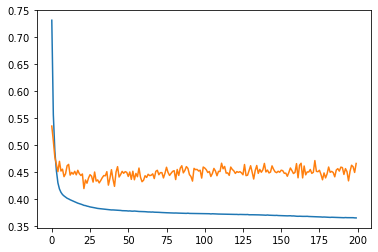

In [704]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

In [702]:
history = model.fit(X_res, y_res, validation_data=(X_tr_test, y_test), epochs=100)

Epoch 1/100
242/244 [============================>.] - ETA: 0s - loss: 0.3643 - accuracy: 0.8366 - auc_5: 0.9074

ValueError: Data cardinality is ambiguous:
  x sizes: 1533
  y sizes: 1022
Make sure all arrays contain the same number of samples.

In [691]:
X_res.shape

(7778, 14)

In [312]:
train_acc = model.evaluate(X_res, y_res, verbose=0)
test_acc = model.evaluate(X_tr_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc[1], test_acc[1]))

Train: 0.836, Test: 0.774


In [692]:
model2 = Sequential(
    [
        tf.keras.Input(shape=(14,)),
        tf.keras.layers.Dense(units=10, activation="relu"),
        tf.keras.layers.Dense(units=6, activation="relu"),
        tf.keras.layers.Dense(units=1, activation="sigmoid")
    ], name="my_model"
)

In [705]:
model2.compile(
  'adam',
  loss='binary_crossentropy',
  metrics=['accuracy', f1_score], #, tf.keras.metrics.AUC()],
)

In [706]:
history = model2.fit(X_res, y_res, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100


NotImplementedError: in user code:

    File "C:\Users\kenta\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\kenta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1130, in f1_score  *
        zero_division=zero_division,
    File "C:\Users\kenta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1259, in fbeta_score  *
        _, _, f, _ = precision_recall_fscore_support(
    File "C:\Users\kenta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1539, in precision_recall_fscore_support  *
        labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
    File "C:\Users\kenta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1348, in _check_set_wise_labels  *
        y_type, y_true, y_pred = _check_targets(y_true, y_pred)
    File "C:\Users\kenta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 84, in _check_targets  *
        check_consistent_length(y_true, y_pred)
    File "C:\Users\kenta\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 330, in check_consistent_length  *
        uniques = np.unique(lengths)
    File "<__array_function__ internals>", line 5, in unique  **
        
    File "C:\Users\kenta\anaconda3\lib\site-packages\numpy\lib\arraysetops.py", line 270, in unique
        ar = np.asanyarray(ar)

    NotImplementedError: Cannot convert a symbolic tf.Tensor (strided_slice_1:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported.


In [316]:
train_acc = model2.evaluate(X_res, y_res, verbose=0)
test_acc = model2.evaluate(X_tr_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc[1], test_acc[1]))

Train: 0.861, Test: 0.793


In [345]:
y_predict = model2.predict(X_tr_test)
y_predict = (y_predict > 0.5)

48/48 [==============================] - 0s 985us/step


In [346]:
y_predict[0]
#y_predict.size

array([False])

In [340]:
def get_classification_metric(testy, probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(testy, probs)
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    return fscore[ix]

In [364]:
print(get_classification_metric(list(y_test), y_predict))

0.20365535248041775


In [367]:
import seaborn as sns

<AxesSubplot:xlabel='avg_glucose_level'>

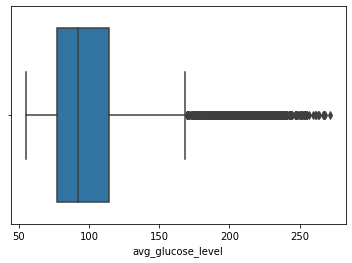

In [422]:
sns.boxplot(X_stroke_df['avg_glucose_level'])

<AxesSubplot:ylabel='Frequency'>

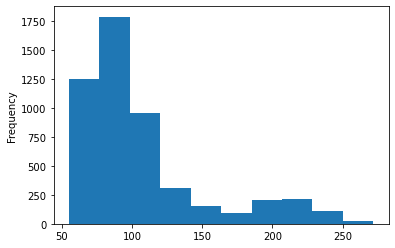

In [423]:
X_stroke_df['avg_glucose_level'].plot(kind='hist')

In [393]:
def get_outlier(df=None, column=None, weight=1.5):
    # only pull out fraud case, and calculate percentile of Q1, and Q3 spot
    # fraud = df[df['Class']==1][column]
    active_col = df[column]
    quantile_25 = np.percentile(active_col.values, 25)
    quantile_75 = np.percentile(active_col.values, 75)
    # multiplying 1.5 to calculated IQR, and add or subtract to Q3, and Q1
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    low_val = quantile_25 - iqr_weight
    print("lowest value = ", low_val)
    high_val = quantile_75 + iqr_weight
    print("highest value = ", high_val)
    # Defining Outlier Values
    outlier_index = active_col[(active_col < low_val) | (active_col > high_val)].index
    return outlier_index, high_val, low_val

In [424]:
outlier_index, high_value, low_value = get_outlier(df=X_stroke_df, column='avg_glucose_level', weight=1.5)
print('Outliers:', outlier_index)

lowest value =  21.977500000000006
highest value =  169.35750000000002
Outliers: Int64Index([   0,    1,    3,    4,    5,   13,   14,   16,   17,   19,
            ...
            5029, 5034, 5035, 5041, 5048, 5061, 5062, 5063, 5064, 5076],
           dtype='int64', length=627)


In [425]:
outlier_index.size

627

In [426]:
X_stroke_df.size

51100

In [427]:
outlier_index.size / X_stroke_df.size

0.012270058708414872

In [428]:
X_stroke_df["avg_glucose_level"] = \
np.where(X_stroke_df["avg_glucose_level"] > high_value, high_value, X_stroke_df["avg_glucose_level"])

<AxesSubplot:ylabel='Frequency'>

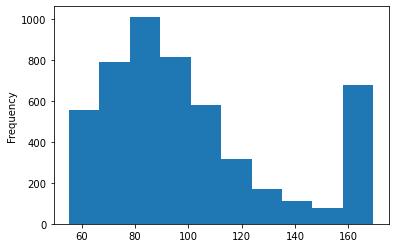

In [396]:
X_stroke_df['avg_glucose_level'].plot(kind='hist')

<AxesSubplot:xlabel='avg_glucose_level'>

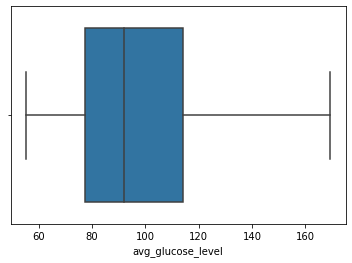

In [429]:
sns.boxplot(X_stroke_df['avg_glucose_level'])

In [430]:
X_stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.7500,NaN,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.2000,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.9900,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.2900,25.6,formerly smoked


In [431]:
# X_stroke_df.tail()
X_stroke_df['bmi'].fillna(stroke_df['bmi'].mean(),inplace=True)
# stroke_df[stroke_df.isna().any(axis=1)]
# stroke_df.isna().any(axis=1).sum()
X_stroke_df.isna().any(axis=1).sum()
# print(X_stroke_df[X_stroke_df.isna().any(axis=1)].to_string())

0

<AxesSubplot:ylabel='Frequency'>

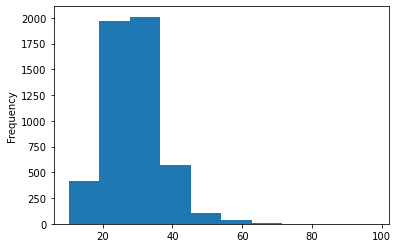

In [558]:
X_stroke_df['bmi'].plot(kind='hist')

<AxesSubplot:xlabel='bmi'>

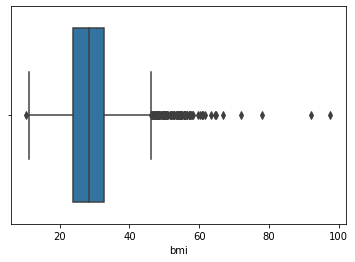

In [559]:
sns.boxplot(X_stroke_df['bmi'])

In [434]:
outlier_index, high_value, low_value = get_outlier(df=X_stroke_df, column='bmi', weight=1.5)
print('Outliers:', outlier_index)

lowest value =  10.300000000000006
highest value =  46.29999999999999
Outliers: Int64Index([  21,   66,  113,  254,  258,  270,  333,  341,  358,  368,
            ...
            4779, 4838, 4847, 4858, 4894, 4906, 4952, 5009, 5057, 5103],
           dtype='int64', length=126)


In [435]:
X_stroke_df["bmi"] = \
np.where(X_stroke_df["bmi"] > high_value, high_value, X_stroke_df["bmi"])

X_stroke_df["bmi"] = \
np.where(X_stroke_df["bmi"] < low_value, low_value, X_stroke_df["bmi"])

<AxesSubplot:ylabel='Frequency'>

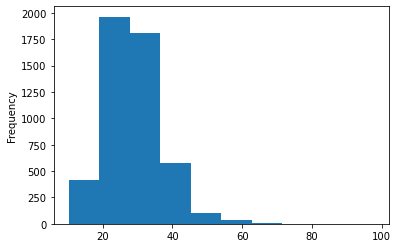

In [553]:
X_stroke_df['bmi'].plot(kind='hist')

<AxesSubplot:xlabel='bmi'>

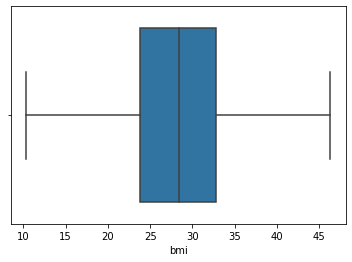

In [437]:
sns.boxplot(X_stroke_df['bmi'])

<AxesSubplot:ylabel='Frequency'>

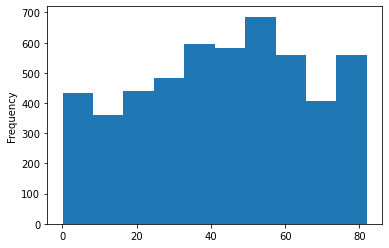

In [438]:
X_stroke_df['age'].plot(kind='hist')

<AxesSubplot:xlabel='age'>

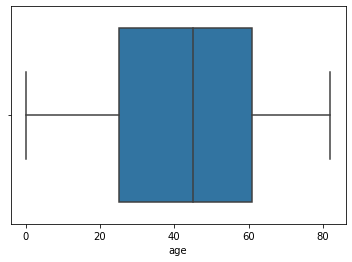

In [439]:
sns.boxplot(X_stroke_df['age'])

In [494]:
X_stroke_df = ordinalize_features(X_stroke_df)

In [450]:
X_stroke_df = normalize_features(X_stroke_df, norm_features)

In [479]:
# X_stroke_df.tail()
X_stroke_df['bmi'].fillna(stroke_df['bmi'].mean(),inplace=True)
# stroke_df[stroke_df.isna().any(axis=1)]
# stroke_df.isna().any(axis=1).sum()
X_stroke_df.isna().any(axis=1).sum()
# print(X_stroke_df[X_stroke_df.isna().any(axis=1)].to_string())

201

In [457]:
X_stroke_df

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,gender_ordinal,smoking_ord,married_ord,residence_ord
0,1.051331,0,1,Private,2.706111,0.981245,0,1,1,0
1,0.785993,0,0,Self-employed,2.121351,28.893237,2,0,1,1
2,1.626231,0,1,Private,-0.005028,0.459222,0,0,1,1
3,0.255317,0,0,Private,1.437217,0.701135,2,2,1,0
4,1.582008,1,0,Self-employed,1.501038,-0.623020,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...
5105,1.626231,1,0,Private,-0.494609,28.893237,2,0,1,0
5106,1.670454,0,0,Self-employed,0.420734,1.414142,2,0,1,0
5107,-0.363806,0,0,Self-employed,-0.511393,0.217309,2,0,1,1
5108,0.343763,0,0,Private,1.328127,-0.419303,0,1,1,1


In [496]:
transformed = transformer.fit_transform(X_stroke_df)

X_transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
X_transformed_df


,onehotencoder__x0_Govt_job,onehotencoder__x0_Never_worked,onehotencoder__x0_Private,onehotencoder__x0_Self-employed,onehotencoder__x0_children,age,hypertension,heart_disease,avg_glucose_level,bmi,bmi_log,bmi_sqrt,avg_glucose_level_log,avg_glucose_level_sqrt,gender_ordinal,smoking_ord,married_ord,residence_ord
0,0.0,0.0,1.0,0.0,0.0,67.0,0.0,1.0,228.69,36.600000,3.600048,6.049793,5.432367,15.122500,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,61.0,0.0,0.0,202.21,28.893237,3.363608,5.375243,5.309307,14.220056,2.0,0.0,1.0,1.0
2,0.0,0.0,1.0,0.0,0.0,80.0,0.0,1.0,105.92,32.500000,3.481240,5.700877,4.662684,10.291744,0.0,0.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0,49.0,0.0,0.0,171.23,34.400000,3.538057,5.865151,5.143008,13.085488,2.0,2.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,174.12,24.000000,3.178054,4.898979,5.159745,13.195454,2.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,0.0,1.0,0.0,0.0,80.0,1.0,0.0,83.75,28.893237,3.363608,5.375243,4.427836,9.151503,2.0,0.0,1.0,0.0
5106,0.0,0.0,0.0,1.0,0.0,81.0,0.0,0.0,125.20,40.000000,3.688879,6.324555,4.829912,11.189281,2.0,0.0,1.0,0.0
5107,0.0,0.0,0.0,1.0,0.0,35.0,0.0,0.0,82.99,30.600000,3.421000,5.531727,4.418720,9.109885,2.0,0.0,1.0,1.0
5108,0.0,0.0,1.0,0.0,0.0,51.0,0.0,0.0,166.29,25.600000,3.242592,5.059644,5.113733,12.895348,0.0,1.0,1.0,1.0


In [458]:
norm_features = ['avg_glucose_level', 'age', 'bmi']

def normalize_features(df, features):
    for feature in features:
        df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()
    return df

X_stroke_df['bmi'].fillna(X_stroke_df['bmi'].mean(),inplace=True)
X_stroke_df = normalize_features(X_stroke_df, norm_features)

In [459]:
X_stroke_df

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,gender_ordinal,smoking_ord,married_ord,residence_ord
0,1.051331,0,1,Private,2.706111,-0.027229,0,1,1,0
1,0.785993,0,0,Self-employed,2.121351,4.867917,2,0,1,1
2,1.626231,0,1,Private,-0.005028,-0.118780,0,0,1,1
3,0.255317,0,0,Private,1.437217,-0.076354,2,2,1,0
4,1.582008,1,0,Self-employed,1.501038,-0.308582,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...
5105,1.626231,1,0,Private,-0.494609,4.867917,2,0,1,0
5106,1.670454,0,0,Self-employed,0.420734,0.048691,2,0,1,0
5107,-0.363806,0,0,Self-employed,-0.511393,-0.161207,2,0,1,1
5108,0.343763,0,0,Private,1.328127,-0.272854,0,1,1,1


In [462]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y_stroke_df, test_size=0.3, random_state=0, stratify=y_stroke_df)

In [621]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [622]:
X_train.shape

(3577, 14)

In [464]:
X_test.shape

(1533, 14)

In [465]:
X_res, y_res = sm.fit_resample(X_tr_train, y_train)

In [466]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

Covariance Matrix
[[1437   21]
 [  71    4]]
Accuracy: 0.9400, Precision: 0.1600, Recall: 0.0533,    F1: 0.0800, AUC:0.7640


In [707]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier()
get_model_train_eval(lgbm_clf, ftr_train=X_res, ftr_test=X_test, tgt_train=y_res, tgt_test=y_test)

Covariance Matrix
[[941  31]
 [ 45   5]]
Accuracy: 0.9256, Precision: 0.1389, Recall: 0.1000,    F1: 0.1163, AUC:0.8076


In [713]:
log_model = LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
log_model.fit(X_res,y_res,eval_set=[(X_test,y_test),(X_res,y_res)],
          verbose=20,eval_metric='logloss')
get_model_train_eval(log_model, ftr_train=X_res, ftr_test=X_test, tgt_train=y_res, tgt_test=y_test)

[20]	training's binary_logloss: 0.280506	valid_0's binary_logloss: 0.330579
[40]	training's binary_logloss: 0.17085	valid_0's binary_logloss: 0.237388
[60]	training's binary_logloss: 0.124409	valid_0's binary_logloss: 0.210079
[80]	training's binary_logloss: 0.0993007	valid_0's binary_logloss: 0.198712
[100]	training's binary_logloss: 0.0820904	valid_0's binary_logloss: 0.195262
Covariance Matrix
[[947  25]
 [ 47   3]]
Accuracy: 0.9295, Precision: 0.1071, Recall: 0.0600,    F1: 0.0769, AUC:0.8071


In [711]:
log_model = LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
log_model.fit(X_res,y_res,eval_set=[(X_test,y_test),(X_res,y_res)],
          verbose=20,eval_metric='logloss')
get_model_train_eval(log_model, ftr_train=X_res, ftr_test=X_test, tgt_train=y_res, tgt_test=y_test)

[20]	training's binary_logloss: 0.280506	valid_0's binary_logloss: 0.330579
[40]	training's binary_logloss: 0.17085	valid_0's binary_logloss: 0.237388
[60]	training's binary_logloss: 0.124409	valid_0's binary_logloss: 0.210079
[80]	training's binary_logloss: 0.0993007	valid_0's binary_logloss: 0.198712
[100]	training's binary_logloss: 0.0820904	valid_0's binary_logloss: 0.195262
Covariance Matrix
[[947  25]
 [ 47   3]]
Accuracy: 0.9295, Precision: 0.1071, Recall: 0.0600,    F1: 0.0769, AUC:0.8071


<AxesSubplot:ylabel='Frequency'>

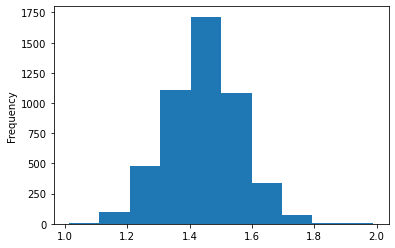

In [582]:
(np.log10(X_stroke_df['bmi'])).plot(kind='hist')

In [600]:
X_stroke_df['bmi_log10'] = np.log10(X_stroke_df['bmi'])

<AxesSubplot:ylabel='Frequency'>

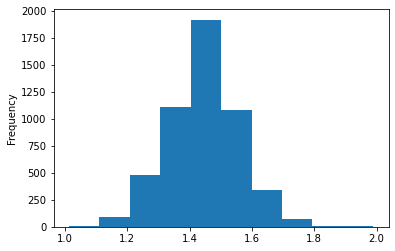

In [601]:
X_stroke_df['bmi_log10'].plot(kind='hist')

<AxesSubplot:xlabel='bmi_log10'>

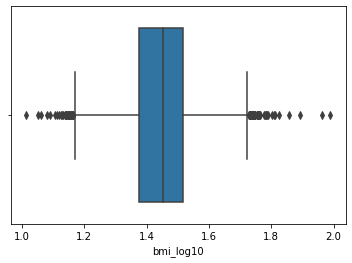

In [590]:
sns.boxplot(X_stroke_df['bmi_log10'])

In [575]:
X_stroke_df['bmi_log'] = np.log(X_stroke_df['bmi'])

<AxesSubplot:ylabel='Frequency'>

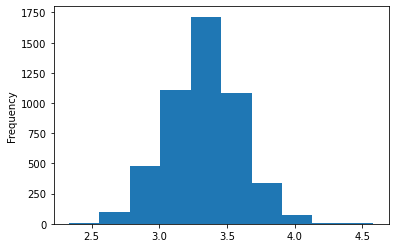

In [469]:
(np.log(X_stroke_df['bmi'])).plot(kind='hist')

In [535]:
X_stroke_df['bmi_log'] = np.log(X_stroke_df['bmi'])

<AxesSubplot:ylabel='Frequency'>

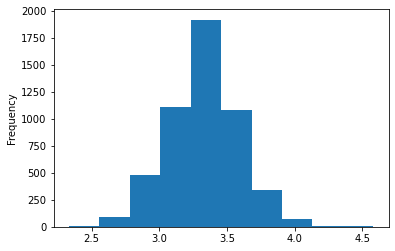

In [576]:
X_stroke_df['bmi_log'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

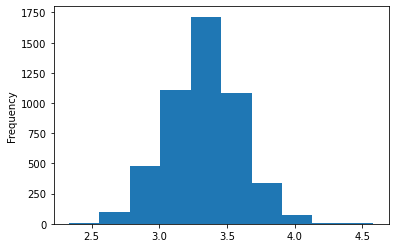

In [536]:
X_stroke_df['bmi_log'].plot(kind='hist')

<AxesSubplot:xlabel='bmi_log'>

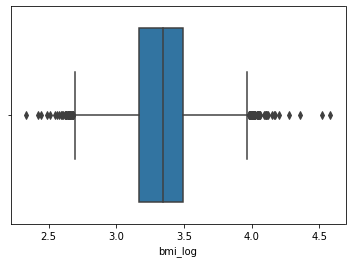

In [577]:
sns.boxplot(X_stroke_df['bmi_log'])

<AxesSubplot:ylabel='Frequency'>

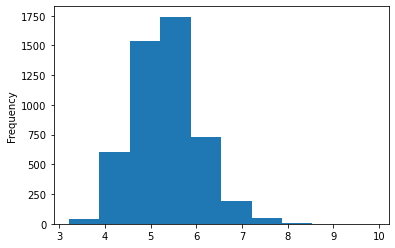

In [476]:
(np.sqrt(X_stroke_df['bmi'])).plot(kind='hist')

In [507]:
X_stroke_df['bmi_sqrt'] = np.sqrt(X_stroke_df['bmi'])

<AxesSubplot:xlabel='bmi_sqrt'>

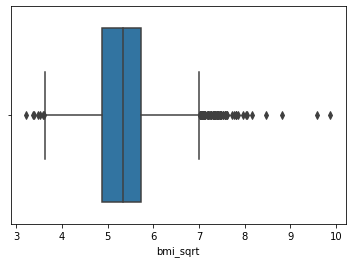

In [484]:
sns.boxplot(X_stroke_df['bmi_sqrt'])

<AxesSubplot:ylabel='Frequency'>

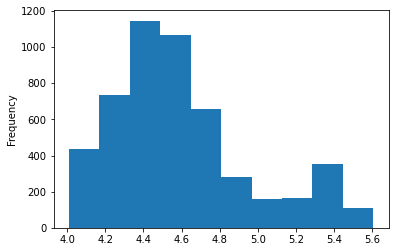

In [540]:
(np.log(X_stroke_df['avg_glucose_level'])).plot(kind='hist')

In [539]:
X_stroke_df['avg_glucose_level_log'] = np.log(X_stroke_df['avg_glucose_level'])

<AxesSubplot:xlabel='avg_glucose_level_log'>

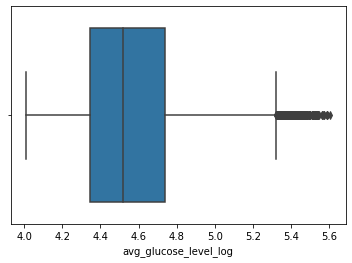

In [488]:
sns.boxplot(X_stroke_df['avg_glucose_level_log'])

<AxesSubplot:ylabel='Frequency'>

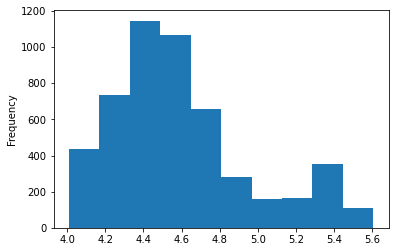

In [542]:
X_stroke_df['avg_glucose_level_log'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

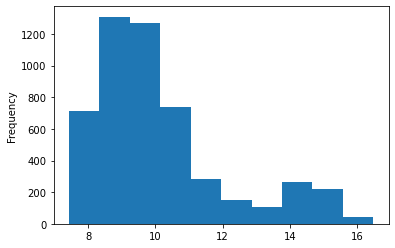

In [490]:
(np.sqrt(X_stroke_df['avg_glucose_level'])).plot(kind='hist')

In [509]:
X_stroke_df['avg_glucose_level_sqrt'] = np.sqrt(X_stroke_df['avg_glucose_level'])

<AxesSubplot:xlabel='avg_glucose_level_sqrt'>

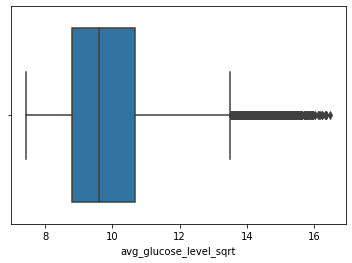

In [492]:
sns.boxplot(X_stroke_df['avg_glucose_level_sqrt'])

<AxesSubplot:ylabel='Frequency'>

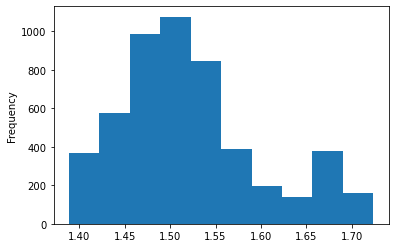

In [543]:
(np.log(X_stroke_df['avg_glucose_level_log'])).plot(kind='hist')

In [544]:
X_stroke_df['avg_glucose_level_log_log'] = np.log(X_stroke_df['avg_glucose_level_log'])

<AxesSubplot:xlabel='avg_glucose_level_log_log'>

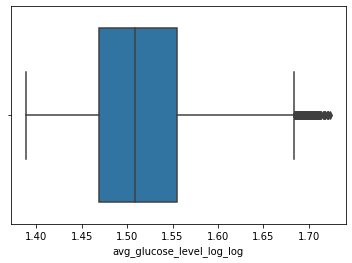

In [547]:
sns.boxplot(X_stroke_df['avg_glucose_level_log_log'])

<AxesSubplot:ylabel='Frequency'>

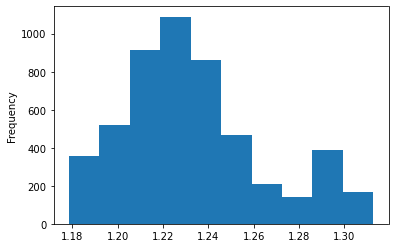

In [546]:
(np.sqrt(X_stroke_df['avg_glucose_level_log_log'])).plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

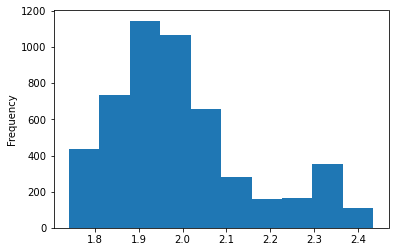

In [548]:
(np.log10(X_stroke_df['avg_glucose_level'])).plot(kind='hist')

<AxesSubplot:xlabel='avg_glucose_level_log10'>

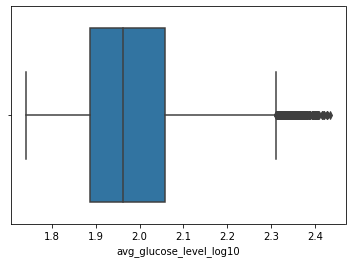

In [551]:
sns.boxplot(X_stroke_df['avg_glucose_level_log10'])

In [598]:
X_stroke_df['avg_glucose_level_log10'] = np.log10(X_stroke_df['avg_glucose_level'])

<AxesSubplot:ylabel='Frequency'>

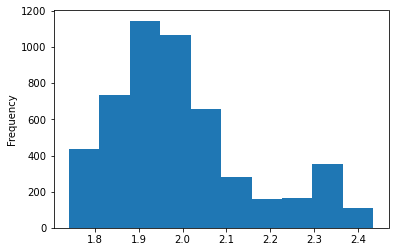

In [599]:
X_stroke_df['avg_glucose_level_log10'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

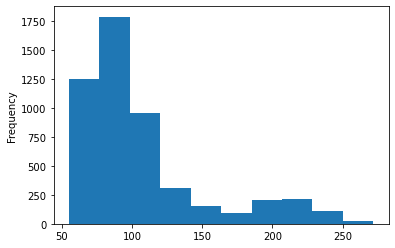

In [550]:
X_stroke_df['avg_glucose_level'].plot(kind='hist')

In [613]:
from sklearn.preprocessing import StandardScaler
standard_scaler =StandardScaler()

In [608]:
stroke_df = pd.read_csv('./healthcare-dataset-stroke-data.csv')
y_stroke_df = stroke_df['stroke']
X_stroke_df = stroke_df.drop(['stroke', 'id'], axis=1)
# X_stroke_df = stroke_df.drop('id', axis=1)
# y_stroke_df.shape
# X_stroke_df.shape
X_stroke_df['bmi'].fillna(X_stroke_df['bmi'].mean(),inplace=True)
X_stroke_df['bmi_log10'] = np.log10(X_stroke_df['bmi'])
X_stroke_df['avg_glucose_level_log10'] = np.log10(X_stroke_df['avg_glucose_level'])
X_stroke_df = X_stroke_df.drop(['bmi', 'avg_glucose_level'], axis=1)
X_stroke_df = ordinalize_features(X_stroke_df)

In [609]:
X_stroke_df

,age,hypertension,heart_disease,work_type,bmi_log10,avg_glucose_level_log10,gender_ordinal,smoking_ord,married_ord,residence_ord
0,67.0,0,1,Private,1.563481,2.359247,0,1,1,0
1,61.0,0,0,Self-employed,1.460796,2.305803,2,0,1,1
2,80.0,0,1,Private,1.511883,2.024978,0,0,1,1
3,49.0,0,0,Private,1.536558,2.233580,2,2,1,0
4,79.0,1,0,Self-employed,1.380211,2.240849,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,Private,1.460796,1.922985,2,0,1,0
5106,81.0,0,0,Self-employed,1.602060,2.097604,2,0,1,0
5107,35.0,0,0,Self-employed,1.485721,1.919026,2,0,1,1
5108,51.0,0,0,Private,1.408240,2.220866,0,1,1,1


In [618]:
transformed = transformer.fit_transform(X_stroke_df)

X_transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
scaled_features = standard_scaler.fit_transform(X_transformed_df)
X_transformed_df = pd.DataFrame(scaled_features, index=X_transformed_df.index, columns=X_transformed_df.columns)
X_transformed_df

,onehotencoder__x0_Govt_job,onehotencoder__x0_Never_worked,onehotencoder__x0_Private,onehotencoder__x0_Self-employed,onehotencoder__x0_children,age,hypertension,heart_disease,bmi_log10,avg_glucose_level_log10,gender_ordinal,smoking_ord,married_ord,residence_ord
0,-0.384111,-0.065756,0.864297,-0.436881,-0.394112,1.051434,-0.328602,4.185032,1.039943,2.320494,-1.189870,0.312184,0.723884,-0.984080
1,-0.384111,-0.065756,-1.157010,2.288955,-0.394112,0.786070,-0.328602,-0.238947,0.130073,1.980500,0.840598,-1.134109,0.723884,1.016178
2,-0.384111,-0.065756,0.864297,-0.436881,-0.394112,1.626390,-0.328602,4.185032,0.582746,0.194001,-1.189870,-1.134109,0.723884,1.016178
3,-0.384111,-0.065756,0.864297,-0.436881,-0.394112,0.255342,-0.328602,-0.238947,0.801387,1.521047,0.840598,1.758477,0.723884,-0.984080
4,-0.384111,-0.065756,-1.157010,2.288955,-0.394112,1.582163,3.043196,-0.238947,-0.583974,1.567288,0.840598,-1.134109,0.723884,1.016178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,-0.384111,-0.065756,0.864297,-0.436881,-0.394112,1.626390,3.043196,-0.238947,0.130073,-0.454840,0.840598,-1.134109,0.723884,-0.984080
5106,-0.384111,-0.065756,-1.157010,2.288955,-0.394112,1.670617,-0.328602,-0.238947,1.381783,0.656022,0.840598,-1.134109,0.723884,-0.984080
5107,-0.384111,-0.065756,-1.157010,2.288955,-0.394112,-0.363842,-0.328602,-0.238947,0.350930,-0.480026,0.840598,-1.134109,0.723884,1.016178
5108,-0.384111,-0.065756,0.864297,-0.436881,-0.394112,0.343796,-0.328602,-0.238947,-0.335617,1.440167,-1.189870,0.312184,0.723884,1.016178


In [674]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y_stroke_df, test_size=0.2, random_state=0, stratify=y_stroke_df)

In [675]:
y_train.size

4088

In [655]:
y_train.value_counts()

0    3889
1     199
Name: stroke, dtype: int64

<AxesSubplot:>

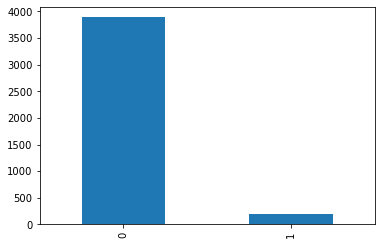

In [653]:
y_train.value_counts().sort_index().plot(kind='bar')

In [500]:
norm_features_extra = ['avg_glucose_level', 'age', 'bmi', 'avg_glucose_level_log', 'avg_glucose_level_sqrt',
                       'bmi_log', 'bmi_sqrt']

def normalize_features(df, features):
    for feature in features:
        df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()
    return df

X_stroke_df['bmi'].fillna(X_stroke_df['bmi'].mean(),inplace=True)
X_stroke_df = normalize_features(X_stroke_df, norm_features_extra)

In [676]:
X_res, y_res = sm.fit_resample(X_train, y_train)

In [677]:
y_res.value_counts().sort_index()

0    3889
1    3889
Name: stroke, dtype: int64

<AxesSubplot:>

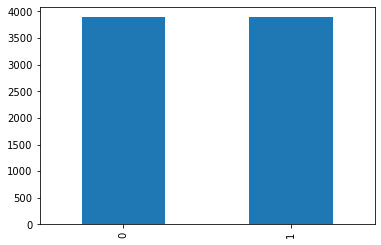

In [652]:
y_res.value_counts().sort_index().plot(kind='bar')

In [678]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_res, ftr_test=X_test, tgt_train=y_res, tgt_test=y_test)

Covariance Matrix
[[944  28]
 [ 45   5]]
Accuracy: 0.9286, Precision: 0.1515, Recall: 0.1000,    F1: 0.1205, AUC:0.7823


In [730]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=500, num_leaves=64)
get_model_train_eval(lgbm_clf, ftr_train=X_res, ftr_test=X_test, tgt_train=y_res, tgt_test=y_test)

Covariance Matrix
[[947  25]
 [ 46   4]]
Accuracy: 0.9305, Precision: 0.1379, Recall: 0.0800,    F1: 0.1013, AUC:0.7868


In [734]:
logreg = LogisticRegression(penalty='none')
get_model_train_eval(logreg, ftr_train=X_res, ftr_test=X_test, tgt_train=y_res, tgt_test=y_test)

Covariance Matrix
[[729 243]
 [ 18  32]]
Accuracy: 0.7446, Precision: 0.1164, Recall: 0.6400,    F1: 0.1969, AUC:0.8097


In [723]:
logreg = LogisticRegression(n_jobs=-1)
get_model_train_eval(logreg, ftr_train=X_res, ftr_test=X_test, tgt_train=y_res, tgt_test=y_test)

Covariance Matrix
[[729 243]
 [ 18  32]]
Accuracy: 0.7446, Precision: 0.1164, Recall: 0.6400,    F1: 0.1969, AUC:0.8095


In [511]:
X_stroke_df = ordinalize_features(X_stroke_df)

In [514]:
norm_features_extra = ['avg_glucose_level', 'age', 'bmi', 'avg_glucose_level_log', 'avg_glucose_level_sqrt',
                       'bmi_log', 'bmi_sqrt']

def normalize_features(df, features):
    for feature in features:
        df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()
    return df

X_stroke_df['bmi'].fillna(X_stroke_df['bmi'].mean(),inplace=True)
X_stroke_df = normalize_features(X_stroke_df, norm_features_extra)

In [515]:
transformed = transformer.fit_transform(X_stroke_df)

X_transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
X_transformed_df

,onehotencoder__x0_Govt_job,onehotencoder__x0_Never_worked,onehotencoder__x0_Private,onehotencoder__x0_Self-employed,onehotencoder__x0_children,age,hypertension,heart_disease,avg_glucose_level,bmi,bmi_log,bmi_sqrt,avg_glucose_level_log,avg_glucose_level_sqrt,gender_ordinal,smoking_ord,married_ord,residence_ord
0,0.0,0.0,1.0,0.0,0.0,1.051331,0.0,1.0,2.706111,1.001136e+00,1.039841,1.033763,2.320267,2.523754,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.785993,0.0,0.0,2.121351,4.615102e-16,0.130060,0.065033,1.980307,2.069421,2.0,0.0,1.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.626231,0.0,1.0,-0.005028,4.685314e-01,0.582689,0.532680,0.193982,0.091724,0.0,0.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.255317,0.0,0.0,1.437217,7.153482e-01,0.801308,0.768596,1.520898,1.498226,2.0,2.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.582008,1.0,0.0,1.501038,-6.356489e-01,-0.583917,-0.618936,1.567135,1.553588,2.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,0.0,1.0,0.0,0.0,1.626231,1.0,0.0,-0.494609,4.615102e-16,0.130060,0.065033,-0.454796,-0.482327,2.0,0.0,1.0,0.0
5106,0.0,0.0,0.0,1.0,0.0,1.670454,0.0,0.0,0.420734,1.442808e+00,1.381648,1.428353,0.655958,0.543586,2.0,0.0,1.0,0.0
5107,0.0,0.0,0.0,1.0,0.0,-0.363806,0.0,0.0,-0.511393,2.217146e-01,0.350896,0.289761,-0.479979,-0.503279,2.0,0.0,1.0,1.0
5108,0.0,0.0,1.0,0.0,0.0,0.343763,0.0,0.0,1.328127,-4.278032e-01,-0.335584,-0.388203,1.440026,1.402501,0.0,1.0,1.0,1.0


In [681]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_res, ftr_test=X_test, tgt_train=y_res, tgt_test=y_test)

Covariance Matrix
[[944  28]
 [ 45   5]]
Accuracy: 0.9286, Precision: 0.1515, Recall: 0.1000,    F1: 0.1205, AUC:0.7823


In [520]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [682]:
logreg = LogisticRegression()
get_model_train_eval(logreg, ftr_train=X_res, ftr_test=X_test, tgt_train=y_res, tgt_test=y_test)

Covariance Matrix
[[729 243]
 [ 18  32]]
Accuracy: 0.7446, Precision: 0.1164, Recall: 0.6400,    F1: 0.1969, AUC:0.8095


In [663]:
from xgboost import XGBRegressor

In [664]:
xgreg = XGBRegressor()
get_model_train_eval(xgreg, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

AttributeError: 'XGBRegressor' object has no attribute 'predict_proba'

In [747]:
from xgboost import XGBClassifier
bst_constr = xgb.XGBClassifier(n_estimators=1000, max_leaves=16)
get_model_train_eval(bst_constr, ftr_train=X_res, ftr_test=X_test, tgt_train=y_res, tgt_test=y_test)

Covariance Matrix
[[943  29]
 [ 44   6]]
Accuracy: 0.9286, Precision: 0.1714, Recall: 0.1200,    F1: 0.1412, AUC:0.7854


In [740]:
from xgboost import XGBClassifier
bst_constr = xgb.XGBClassifier(n_estimators=1000)
get_model_train_eval(bst_constr, ftr_train=X_res, ftr_test=X_test, tgt_train=y_res, tgt_test=y_test)

Covariance Matrix
[[945  27]
 [ 44   6]]
Accuracy: 0.9305, Precision: 0.1818, Recall: 0.1200,    F1: 0.1446, AUC:0.7848


In [775]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=4000, criterion='entropy')
get_model_train_eval(rf_model, ftr_train=X_res, ftr_test=X_test, tgt_train=y_res, tgt_test=y_test)

Covariance Matrix
[[928  44]
 [ 44   6]]
Accuracy: 0.9139, Precision: 0.1200, Recall: 0.1200,    F1: 0.1200, AUC:0.7925


In [771]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=4000)
get_model_train_eval(rf_model, ftr_train=X_res, ftr_test=X_test, tgt_train=y_res, tgt_test=y_test)

Covariance Matrix
[[931  41]
 [ 43   7]]
Accuracy: 0.9178, Precision: 0.1458, Recall: 0.1400,    F1: 0.1429, AUC:0.7896


In [ ]:
get_model_train_eval(xgreg, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

In [765]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=27)
get_model_train_eval(gb_model, ftr_train=X_res, ftr_test=X_test, tgt_train=y_res, tgt_test=y_test)

Covariance Matrix
[[773 199]
 [ 19  31]]
Accuracy: 0.7867, Precision: 0.1348, Recall: 0.6200,    F1: 0.2214, AUC:0.7922


In [766]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=26)
get_model_train_eval(gb_model, ftr_train=X_res, ftr_test=X_test, tgt_train=y_res, tgt_test=y_test)

Covariance Matrix
[[772 200]
 [ 19  31]]
Accuracy: 0.7857, Precision: 0.1342, Recall: 0.6200,    F1: 0.2206, AUC:0.7939


In [767]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
get_model_train_eval(linear_model, ftr_train=X_res, ftr_test=X_test, tgt_train=y_res, tgt_test=y_test)

AttributeError: 'LinearRegression' object has no attribute 'predict_proba'

In [524]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [531]:
xgb_clf = XGBClassifier(objective='binary:logistic',nthread=4, seed=42)
xgb_param = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_xgb = GridSearchCV(xgb_clf, xgb_param, scoring='roc_auc', cv=5)
search_xgb = grid_xgb.fit(X_train, y_train)
best_xgb = search_xgb.best_estimator_

In [532]:
get_model_train_eval(grid_xgb, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

Covariance Matrix
[[1458    0]
 [  75    0]]
Accuracy: 0.9511, Precision: 0.0000, Recall: 0.0000,    F1: 0.0000, AUC:0.8421


In [619]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

Covariance Matrix
[[1435   23]
 [  70    5]]
Accuracy: 0.9393, Precision: 0.1786, Recall: 0.0667,    F1: 0.0971, AUC:0.7734


In [784]:
from sklearn.decomposition import PCA
pca_14 = PCA(n_components=14, random_state=0)
pca_14.fit(X_train)

PCA(n_components=14, random_state=0)

In [811]:
contrib = pca_14.explained_variance_ratio_
contrib

array([2.14724593e-01, 1.20820765e-01, 8.86409138e-02, 8.11422061e-02,
       7.50869140e-02, 7.19355159e-02, 6.77416312e-02, 6.39992446e-02,
       6.30469675e-02, 5.88208412e-02, 4.53959720e-02, 3.08586706e-02,
       1.77857648e-02, 2.13540541e-33])

In [810]:
eigenv = pca_14.explained_variance_
eigenv

array([2.99907370e+00, 1.68751225e+00, 1.23805396e+00, 1.13331898e+00,
       1.04874428e+00, 1.00472848e+00, 9.46152194e-01, 8.93882013e-01,
       8.80581491e-01, 8.21554884e-01, 6.34048779e-01, 4.31005253e-01,
       2.48415046e-01, 2.98253596e-32])

In [814]:
cumsum = np.cumsum(pca_14.explained_variance_ratio_)
cumsum

array([0.21472459, 0.33554536, 0.42418627, 0.50532848, 0.58041539,
       0.65235091, 0.72009254, 0.78409178, 0.84713875, 0.90595959,
       0.95135556, 0.98221424, 1.        , 1.        ])

In [829]:
pca_df = pd.DataFrame({'Eigenvalue': eigenv,
                      'Contribution': contrib,
                      'Cumulative Contribution': cumsum},
                               index=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14'])

In [835]:
pca_df
import dataframe_image as dfi
dfi.export(pca_df, "pca_df.png")

Text(0, 0.5, 'Explained variance')

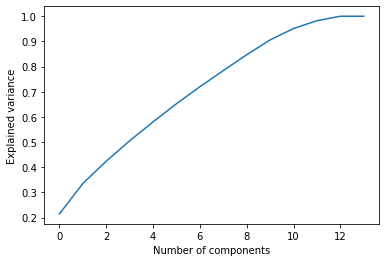

In [791]:
plt.plot(np.cumsum(pca_14.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Text(0, 0.5, 'Variance explained')

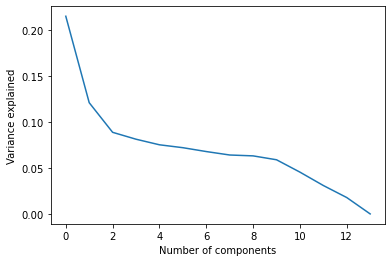

In [837]:
plt.plot(pca_14.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Variance explained')

In [783]:
X_train

,onehotencoder__x0_Govt_job,onehotencoder__x0_Never_worked,onehotencoder__x0_Private,onehotencoder__x0_Self-employed,onehotencoder__x0_children,age,hypertension,heart_disease,bmi_log10,avg_glucose_level_log10,gender_ordinal,smoking_ord,married_ord,residence_ord
943,-0.384111,-0.065756,0.864297,-0.436881,-0.394112,1.405253,-0.328602,-0.238947,1.624122,-0.368774,0.840598,-1.134109,0.723884,-0.984080
821,2.603417,-0.065756,-1.157010,-0.436881,-0.394112,1.184116,3.043196,-0.238947,1.050443,-0.297435,0.840598,0.312184,0.723884,1.016178
4675,-0.384111,-0.065756,-1.157010,-0.436881,2.537348,-1.557980,-0.328602,-0.238947,-0.953954,-1.222625,-1.189870,0.312184,-1.381436,1.016178
3737,-0.384111,-0.065756,-1.157010,2.288955,-0.394112,1.316798,-0.328602,-0.238947,-0.046143,-0.001331,0.840598,0.312184,0.723884,1.016178
2067,-0.384111,-0.065756,-1.157010,2.288955,-0.394112,-0.142705,-0.328602,-0.238947,2.225059,2.123737,0.840598,0.312184,0.723884,1.016178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655,-0.384111,-0.065756,-1.157010,-0.436881,2.537348,-1.469526,-0.328602,-0.238947,-2.291365,-1.504391,0.840598,-1.134109,-1.381436,-0.984080
3126,-0.384111,-0.065756,-1.157010,2.288955,-0.394112,0.476478,-0.328602,-0.238947,1.391391,0.411852,-1.189870,0.312184,0.723884,-0.984080
3896,-0.384111,-0.065756,0.864297,-0.436881,-0.394112,-0.540751,-0.328602,-0.238947,-0.764519,0.100355,0.840598,1.758477,-1.381436,-0.984080
1099,-0.384111,-0.065756,0.864297,-0.436881,-0.394112,-0.408069,-0.328602,-0.238947,-0.159333,-0.395444,-1.189870,0.312184,0.723884,-0.984080


In [792]:
loadings = pca_14.components_

In [793]:
num_pc = pca_14.n_features_

In [794]:
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]

In [795]:
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))

In [796]:
loadings_df['variable'] = X_train.columns.values

In [797]:
loadings_df = loadings_df.set_index('variable')

In [798]:
loadings

array([[-7.12630330e-02,  5.20891369e-02, -1.72358463e-01,
        -1.63964248e-01,  4.86229042e-01, -5.03261562e-01,
        -2.03531814e-01, -1.48598832e-01, -3.83713361e-01,
        -1.56560904e-01, -3.54265235e-02,  4.52808171e-02,
        -4.55360751e-01, -3.58189264e-03],
       [ 3.19246171e-01,  1.51780779e-02, -7.15905985e-01,
         5.08065960e-01,  1.75703787e-01,  1.31723035e-01,
         1.55144430e-01,  1.42504294e-01, -1.20580233e-01,
         1.05819122e-01, -7.15432040e-02,  1.78183978e-02,
         3.89041308e-02, -4.37301662e-02],
       [-6.21812705e-01, -4.73641347e-02,  1.48497097e-01,
         2.11905765e-01,  1.75980588e-01,  2.71704311e-02,
         2.54126380e-01,  3.61689861e-01, -1.03027906e-01,
         3.26055390e-01, -3.87492765e-01,  1.97906902e-01,
        -9.02168204e-02,  5.15679986e-02],
       [ 5.18161340e-01, -5.07720791e-02,  1.04768692e-02,
        -5.32995372e-01,  5.93154925e-02, -3.23040538e-02,
         4.14747377e-02,  2.70539490e-01,  6.

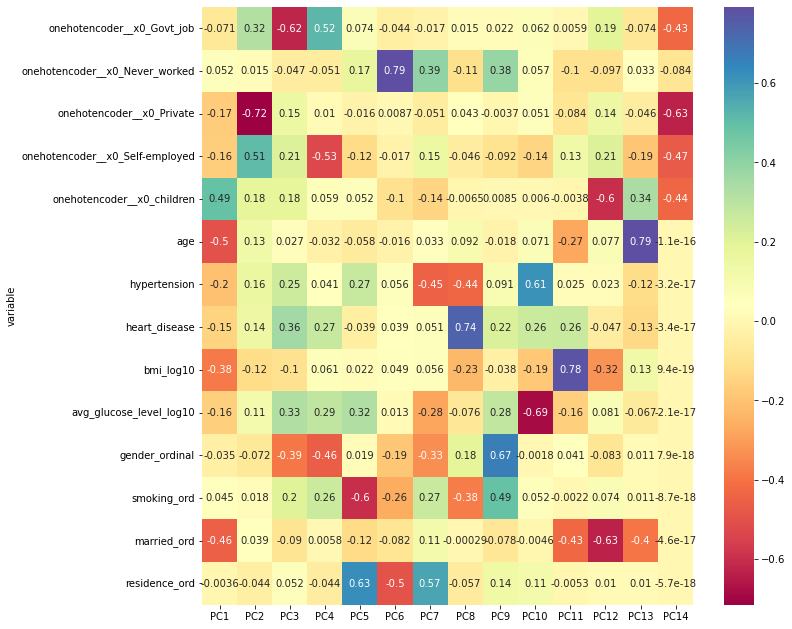

In [843]:
plt.figure(figsize=(11,11))
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
heatmap = ax.get_figure()
heatmap.savefig("heatmap.png")